Enunciado:

Queremos predecir la presión arterial sistólica de los pacientes utilizando regresión lineal y determinar si un paciente tiene diabetes utilizando regresión logística. Para esto, contamos con un dataset que incluye las siguientes variables:

* Edad
* IMC (Índice de Masa Corporal)
* Colesterol
* Glucosa
* Presión Arterial Sistólica (variable objetivo para la regresión lineal)
* Diabetes (variable objetivo para la regresión logística)






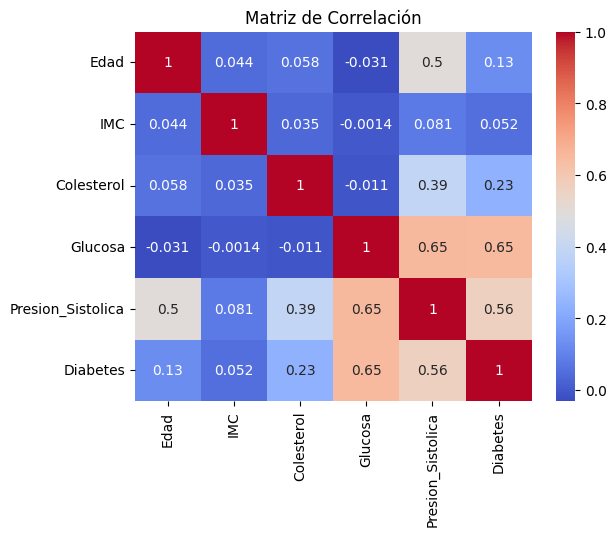

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ---------------------------
# Generación de datos ficticios
# ---------------------------
np.random.seed(42)
n_samples = 1000
edad = np.random.randint(0, 80, size=n_samples)
imc = np.random.uniform(18, 35, size=n_samples)
colesterol = np.random.uniform(150, 250, size=n_samples)
glucosa = np.random.uniform(70, 180, size=n_samples)
presion_sistolica = 120 + 0.5 * edad + 0.2 * imc + 0.3 * colesterol + 0.5 * glucosa + np.random.randn(n_samples) * 10
diabetes = (0.03 * edad + 0.05 * imc + 0.04 * colesterol + 0.1 * glucosa + np.random.randn(n_samples) > 20).astype(int)

# Crear DataFrame
data = pd.DataFrame({
    'Edad': edad,
    'IMC': imc,
    'Colesterol': colesterol,
    'Glucosa': glucosa,
    'Presion_Sistolica': presion_sistolica,
    'Diabetes': diabetes
})

# Análisis de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Eliminar variables altamente correlacionadas (suponiendo que eliminamos 'Colesterol' debido a alta correlación)
# Aquí, decidimos eliminar 'Colesterol' debido a su alta correlación con otras variables
# Esta decisión se toma para evitar problemas de multicolinealidad
data = data.drop(columns=['Colesterol'])



In [ ]:
data.head()

,Edad,IMC,Glucosa,Presion_Sistolica,Diabetes
0,51,19.925047,149.016429,273.240098,1
1,14,34.742300,97.207435,244.344920,1
2,71,32.261267,140.467670,284.911855,1
3,60,20.119266,143.326053,276.299122,1
4,20,33.654312,87.896972,212.143361,0


X_lin es un DataFrame que contiene las variables independientes (predictoras) que vamos a usar para predecir la presión arterial sistólica (Presion_Sistolica). Aquí, seleccionamos Edad, IMC, y Glucosa.
y_lin es una Serie que contiene la variable dependiente (objetivo) que queremos predecir, que en este caso es la presión arterial sistólica (Presion_Sistolica).

Error Cuadrático Medio (MSE): 207.21
Coeficiente de Determinación (R^2): 0.7008


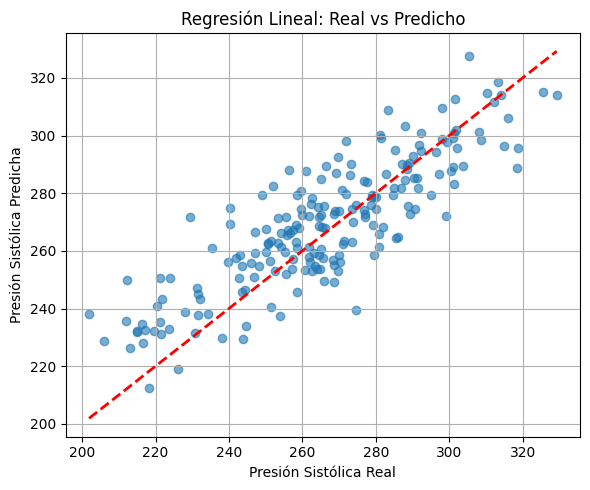

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


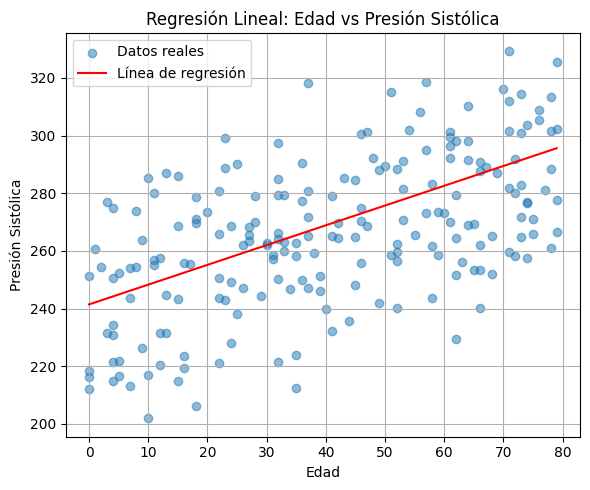

🔮 Predicción de presión sistólica para [Edad=50, IMC=27, Glucosa=110]: 272.02 mmHg


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# División de los datos para regresión lineal
X_lin = data[['Edad', 'IMC', 'Glucosa']]
y_lin = data['Presion_Sistolica']  # 80-180
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal con SGDRegressor
pipeline_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='optimal'))
])
pipeline_lin.fit(X_train_lin, y_train_lin)
y_pred_lin = pipeline_lin.predict(X_test_lin)

# Evaluar el modelo de regresión lineal
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)
print(f'Error Cuadrático Medio (MSE): {mse_lin:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2_lin:.4f}')

# Gráfico 1: Real vs Predicho
plt.figure(figsize=(6, 5))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.6)
plt.plot([y_test_lin.min(), y_test_lin.max()], [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2)
plt.xlabel('Presión Sistólica Real')
plt.ylabel('Presión Sistólica Predicha')
plt.title('Regresión Lineal: Real vs Predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Edad vs Presión Sistólica (con línea de regresión)
edad_range = np.linspace(X_test_lin['Edad'].min(), X_test_lin['Edad'].max(), 100).reshape(-1, 1)
imc_mean = X_test_lin['IMC'].mean()
glucosa_mean = X_test_lin['Glucosa'].mean()
X_vis = np.hstack([edad_range, np.full((100, 1), imc_mean), np.full((100, 1), glucosa_mean)])
y_vis_pred = pipeline_lin.predict(X_vis)

plt.figure(figsize=(6, 5))
plt.scatter(X_test_lin['Edad'], y_test_lin, alpha=0.5, label='Datos reales')
plt.plot(edad_range, y_vis_pred, color='red', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.title('Regresión Lineal: Edad vs Presión Sistólica')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predicción con datos nuevos
nueva_muestra = pd.DataFrame([[50, 27, 110]], columns=['Edad', 'IMC', 'Glucosa'])
prediccion = pipeline_lin.predict(nueva_muestra)
print(f'🔮 Predicción de presión sistólica para [Edad=50, IMC=27, Glucosa=110]: {prediccion[0]:.2f} mmHg')


Una presión sistólica de 272.02 mmHg es extremadamente alta y se considera una crisis hipertensiva, lo cual es potencialmente peligroso y requiere atención médica inmediata.

Exactitud (Accuracy): 0.8900
Precisión (Precision): 0.8800

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        64
           1       0.88      0.97      0.92       136

    accuracy                           0.89       200
   macro avg       0.90      0.84      0.87       200
weighted avg       0.89      0.89      0.89       200



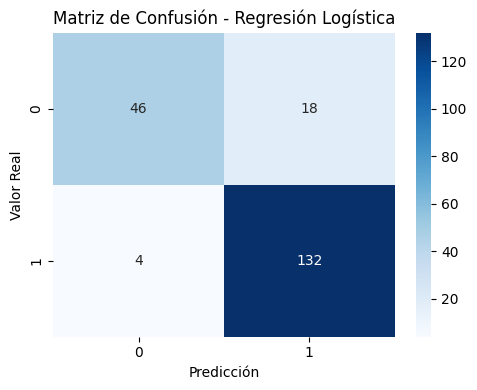

🔮 Predicción: DIABÉTICO
Probabilidad de Diabetes: 91.96%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# División de los datos para regresión logística
X_log = data[['Edad', 'IMC', 'Glucosa']]
y_log = data['Diabetes']  # predecir BINARIO: 0 = No, 1 = Sí
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Entrenamiento del modelo con SGDClassifier
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42))
])
pipeline_log.fit(X_train_log, y_train_log)
y_pred_log = pipeline_log.predict(X_test_log)

# Evaluación del modelo
accuracy_log = accuracy_score(y_test_log, y_pred_log)
precision_log = precision_score(y_test_log, y_pred_log)
print(f'Exactitud (Accuracy): {accuracy_log:.4f}')
print(f'Precisión (Precision): {precision_log:.4f}')

# Reporte de clasificación (opcional)
print("\nReporte de Clasificación:")
print(classification_report(y_test_log, y_pred_log))

# Matriz de confusión
conf_matrix_log = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.show()

# Predicción con nuevos datos
nueva_muestra_log = pd.DataFrame([[50, 27, 110]], columns=['Edad', 'IMC', 'Glucosa'])
prediccion_clase = pipeline_log.predict(nueva_muestra_log)[0]
prediccion_proba = pipeline_log.predict_proba(nueva_muestra_log)[0][1]  # Probabilidad de clase positiva

print(f'🔮 Predicción: {"DIABÉTICO" if prediccion_clase == 1 else "NO DIABÉTICO"}')
print(f'Probabilidad de Diabetes: {prediccion_proba:.2%}')




# 📊 Evaluación del Modelo - Explicación de Métricas

A continuación se explican las métricas utilizadas para evaluar los modelos de **regresión lineal** y **regresión logística**. Los valores son aleatorios, por lo que lo importante aquí es comprender el **significado de cada métrica**.

---

## 🔢 Regresión Lineal

### 🧮 **Error Cuadrático Medio (MSE)**
- Mide el promedio del **cuadrado de los errores** entre los valores reales y las predicciones.
- Cuanto más bajo, mejor.
- Penaliza más los errores grandes.

**Fórmula:**

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 $

---

### 📈 **Coeficiente de Determinación ($R^2$)**
- Indica qué tan bien el modelo explica la variabilidad de la variable dependiente.
- Va de $-\infty$ a $1$:
  - $R^2 = 1$: predicción perfecta.
  - $R^2 = 0$: el modelo no mejora respecto a predecir la media.
  - $R^2 < 0$: el modelo es peor que predecir la media.

**Fórmula:**

$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $

---

## ✅ Regresión Logística (Clasificación Binaria)

### 🧮 **Exactitud (Accuracy)**
- Porcentaje de predicciones correctas (positivas y negativas).
- Funciona bien solo si las clases están balanceadas.

**Fórmula:**

$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $

---

### 🎯 **Precisión (Precision)**
- De las predicciones positivas, ¿cuántas fueron realmente positivas?
- Útil cuando los **falsos positivos son costosos**.

**Fórmula:**

$ \text{Precision} = \frac{TP}{TP + FP} $

---

### 🔍 **¿Qué es la Matriz de Confusión?**
La matriz de confusión muestra cómo se distribuyen las predicciones del modelo, comparándolas con los valores reales.

|                 | Predicción Positiva | Predicción Negativa |
|-----------------|---------------------|---------------------|
| **Real Positivo** | TP (Verdadero Positivo) | FN (Falso Negativo) |
| **Real Negativo** | FP (Falso Positivo)     | TN (Verdadero Negativo) |

- **TP (True Positive):** Casos correctamente predichos como positivos.
- **TN (True Negative):** Casos correctamente predichos como negativos.
- **FP (False Positive):** Casos negativos mal clasificados como positivos.
- **FN (False Negative):** Casos positivos mal clasificados como negativos.

> 🔍 Una matriz equilibrada (con pocos errores) indica un buen rendimiento del modelo. También ayuda a identificar **qué tipo de error comete más el modelo**.

---

> 💡 *Estas métricas y visualizaciones ayudan a entender no solo cuán bien predice el modelo, sino también cómo y dónde se equivoca.*
